# What is a Knowledge Graph


A Knowledge Graph is a network of data points linked by relationships that describe a specific area, like a company, an organization, or a research field. It’s a useful way to organize and understand data, since it can be created automatically and explored to uncover new insights.

The idea comes from Graph Theory. In this setup, each piece of data (like an entity) is shown as a node, and the connections between them are edges. In real Knowledge Graphs, there are many nodes and edges, often with multiple paths connecting different entities.

These graphs are often represented with triples — sets of three parts: (subject, relationship, object). The relationship links the two entities. For example: (London, is_capital_of, England).







Entity 1 and Entity 2 are called nodes, and the link between them is an edge. In real Knowledge Graphs, there are many nodes and edges, and you can reach one node from another in several ways.

These graphs are often shown as triples, which are groups of three things: (subject, action, object). The action connects the two items — for example, (London, is_the_capital_of, Great_Britain).

[London] ---- is_capital_of ----> [Great_Britain]


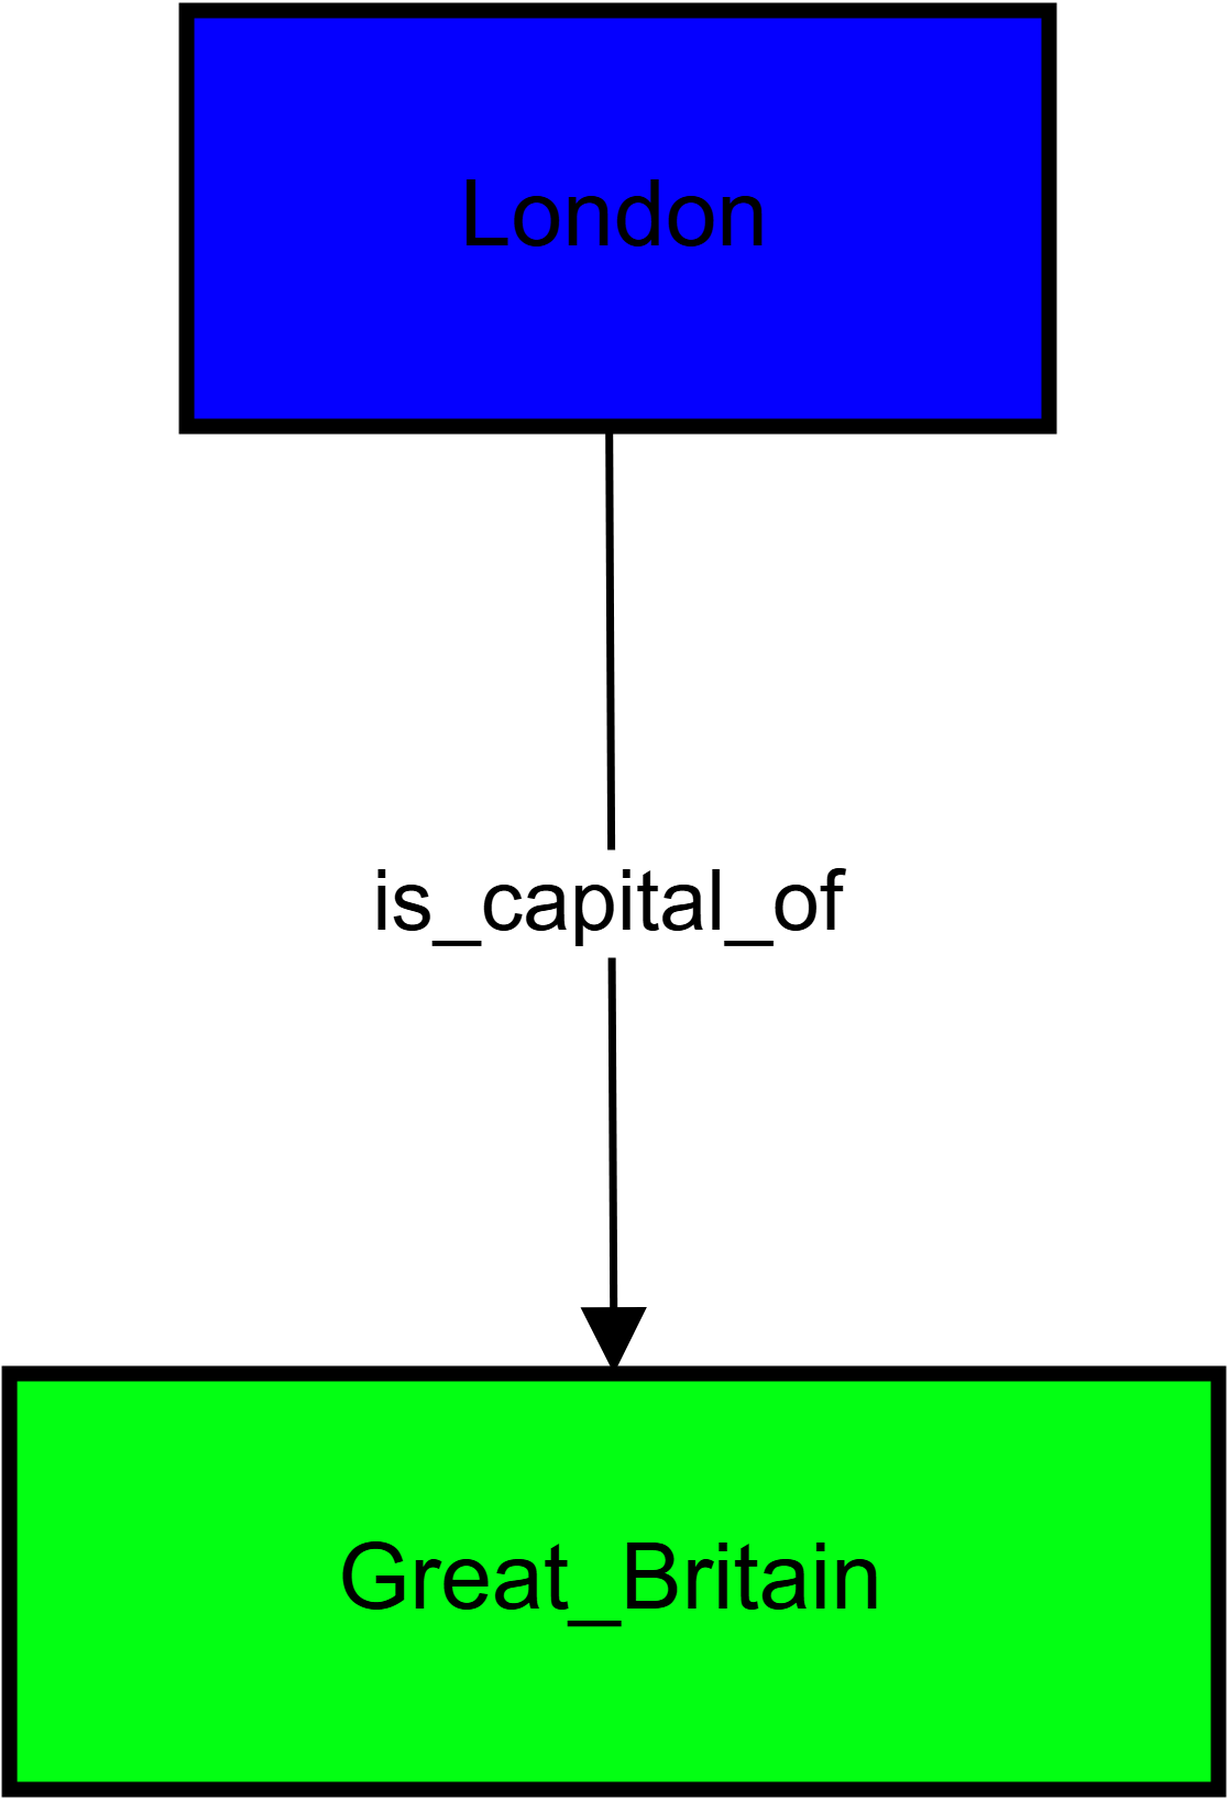

# Data download

Please download [SQuAD2.0](https://rajpurkar.github.io/SQuAD-explorer/) by [this link](https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json) and place dev-v2.0.json at the folder of this .ipynb notebook


In [ ]:
import json
import pandas as pd

# Load the sample file
with open("dev-v2.0.json", "r") as f:
    data = json.load(f)

# Extract all context paragraphs
contexts = []
for entry in data["data"]:
    for para in entry["paragraphs"]:
        contexts.append(para["context"])

# Build a DataFrame
candidate_sentences = pd.DataFrame({"sentence": contexts})
print(candidate_sentences.shape)
candidate_sentences.head(2)


Please load the data and show first 2 lines of candidate_sentences. What is the first sentence in candidate_sentences?

Answer:


[YOUR ANSWER HERE]

# Creating the knowledge graph (KG)

The following code will process the data into KG

In [ ]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("en_core_web_sm")

def get_entities(sent):
    ent1, ent2 = "", ""
    prv_dep, prv_text, prefix, modifier = "", "", "", ""
    for tok in nlp(sent):
        if tok.dep_ != "punct":
            if tok.dep_ == "compound":
                prefix = tok.text if prv_dep != "compound" else prv_text + " " + tok.text
            if tok.dep_.endswith("mod"):
                modifier = tok.text if prv_dep != "compound" else prv_text + " " + tok.text
            if "subj" in tok.dep_:
                ent1 = (modifier + " " + prefix + " " + tok.text).strip()
                prefix = modifier = ""
            if "obj" in tok.dep_:
                ent2 = (modifier + " " + prefix + " " + tok.text).strip()
            prv_dep, prv_text = tok.dep_, tok.text
    return [ent1, ent2]

def get_relation(sent):
    doc = nlp(sent)
    matcher = Matcher(nlp.vocab)
    pattern = [{'DEP':'ROOT'},
               {'DEP':'prep','OP':"?"},
               {'DEP':'agent','OP':"?"},
               {'POS':'ADJ','OP':"?"}]
    matcher.add("relation", [pattern])
    matches = matcher(doc)
    if matches:
        span = doc[matches[-1][1]:matches[-1][2]]
        return span.text
    return ""


from tqdm import tqdm

entity_pairs = [get_entities(i) for i in tqdm(candidate_sentences["sentence"])]
relations = # YOUR CODE HERE



# Visualizing KG

Let's take a look at the resulting KG

In [ ]:
kg_df = pd.DataFrame({
    "source": [e[0] for e in entity_pairs],
    "target":  # YOUR CODE HERE
    "edge": relations
})

# Clean empty nodes
kg_df = kg_df[(kg_df["source"] != "") & (kg_df["target"] != "")]
kg_df.head()


Please show the knowledge graph (KG) table.

In [ ]:
kg_df

From the table tell where "9th Medieval Norseman" comes from?


[YOUR ANSWER HERE]

In [ ]:
# Visualize the whole graph

G = nx.from_pandas_edgelist(kg_df,
                            "source", "target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, with_labels=True, node_color='lightcoral', node_size=1500, font_weight='bold', pos=pos)
plt.show()
# Note: it may take some time to process

As you can see -- there is a lot of nodes, hard to read this graph

Now let's visualize only the nodes that are connected via relation type "include"

In [ ]:
relation_type = "include"
G = nx.from_pandas_edgelist(kg_df[kg_df['edge'] == relation_type],
                            "source", "target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, with_labels=True, node_color='lightcoral', node_size=1500, font_weight='bold', pos=pos)
plt.show()



Please visualize the graph.
What does "Central business districts" include according to this KG?

[YOUR ANSWER HERE]

Complete the following code to visualize KG for relation_type "announced":

In [ ]:

relation_type = "announced"
# YOUR CODE HERE


How many nodes / relations are in this KG?

[YOUR ANSWER HERE]

Let's identify the most common relations in the graph  

In [ ]:
relation_counts = kg_df["edge"].value_counts().reset_index()
relation_counts.columns =  # YOUR CODE HERE
display(relation_counts)

What are the top 3 most common relations?

[YOUR ANSWER HERE]